In [2]:
# Standard Imports and Extensions  

%matplotlib inline
%config InlineBackend.figure_format='retina' # Comment out if not on Mac

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16.0, 10.0)

# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# In my python 2.7 environment, this is not set up by default - fix this.
if np.datetime64 not in mpl.units.registry:
    from pandas.tseries import converter as pdtc
    pdtc.register()

In [3]:
# Simple STL plotting utility  

def stl_plot(stl):

    """
    Plot components of STL decomposition using matplotlib

    :param stl_decomposition: pandas.DataFrame with data, trend, seasonal and residual columns
    """
    fig, axes = plt.subplots(4, 1, sharex=True)

    axes[0].set_ylabel("observations")
    axes[1].set_ylabel("trend")
    axes[2].set_ylabel("seasonal")
    axes[3].set_ylabel("residual")

    _ = axes[0].plot(stl.data)
    _ = axes[1].plot(stl.trend)
    _ = axes[2].plot(stl.seasonal)
    _ = axes[3].plot(stl.residual)


In [6]:
columns = ["data", "seasonal", "trend", "residual"]
time = pd.date_range('3/1/1958 00:00:00', periods=708, freq='M')

stl_java = pd.read_csv("output.csv", header=None)
stl_java.columns = columns
stl_java.index = time

stl_fortran = pd.read_csv("fortran_benchmark/output.csv", header=None)
stl_fortran.columns = columns
stl_fortran.index = time

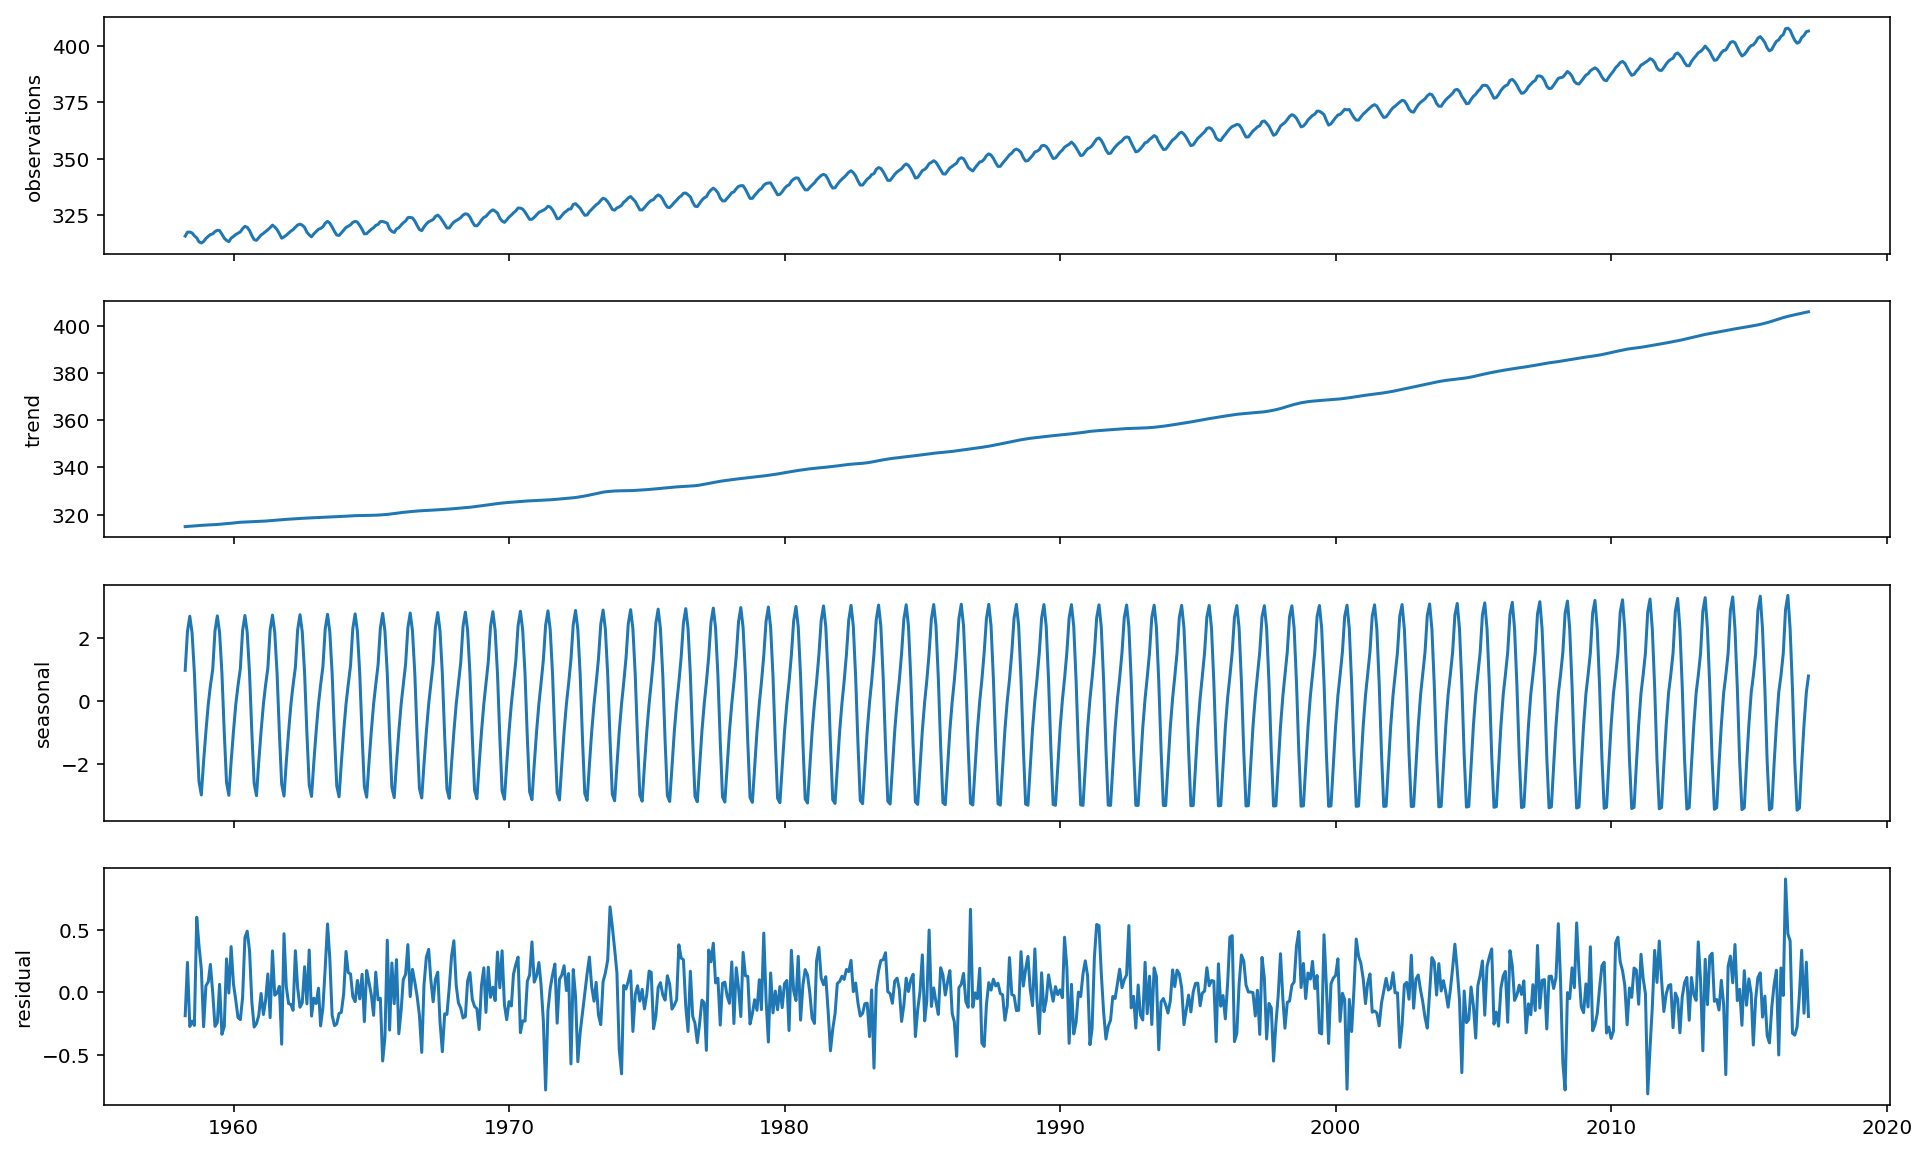

In [7]:
stl_plot(stl_java)

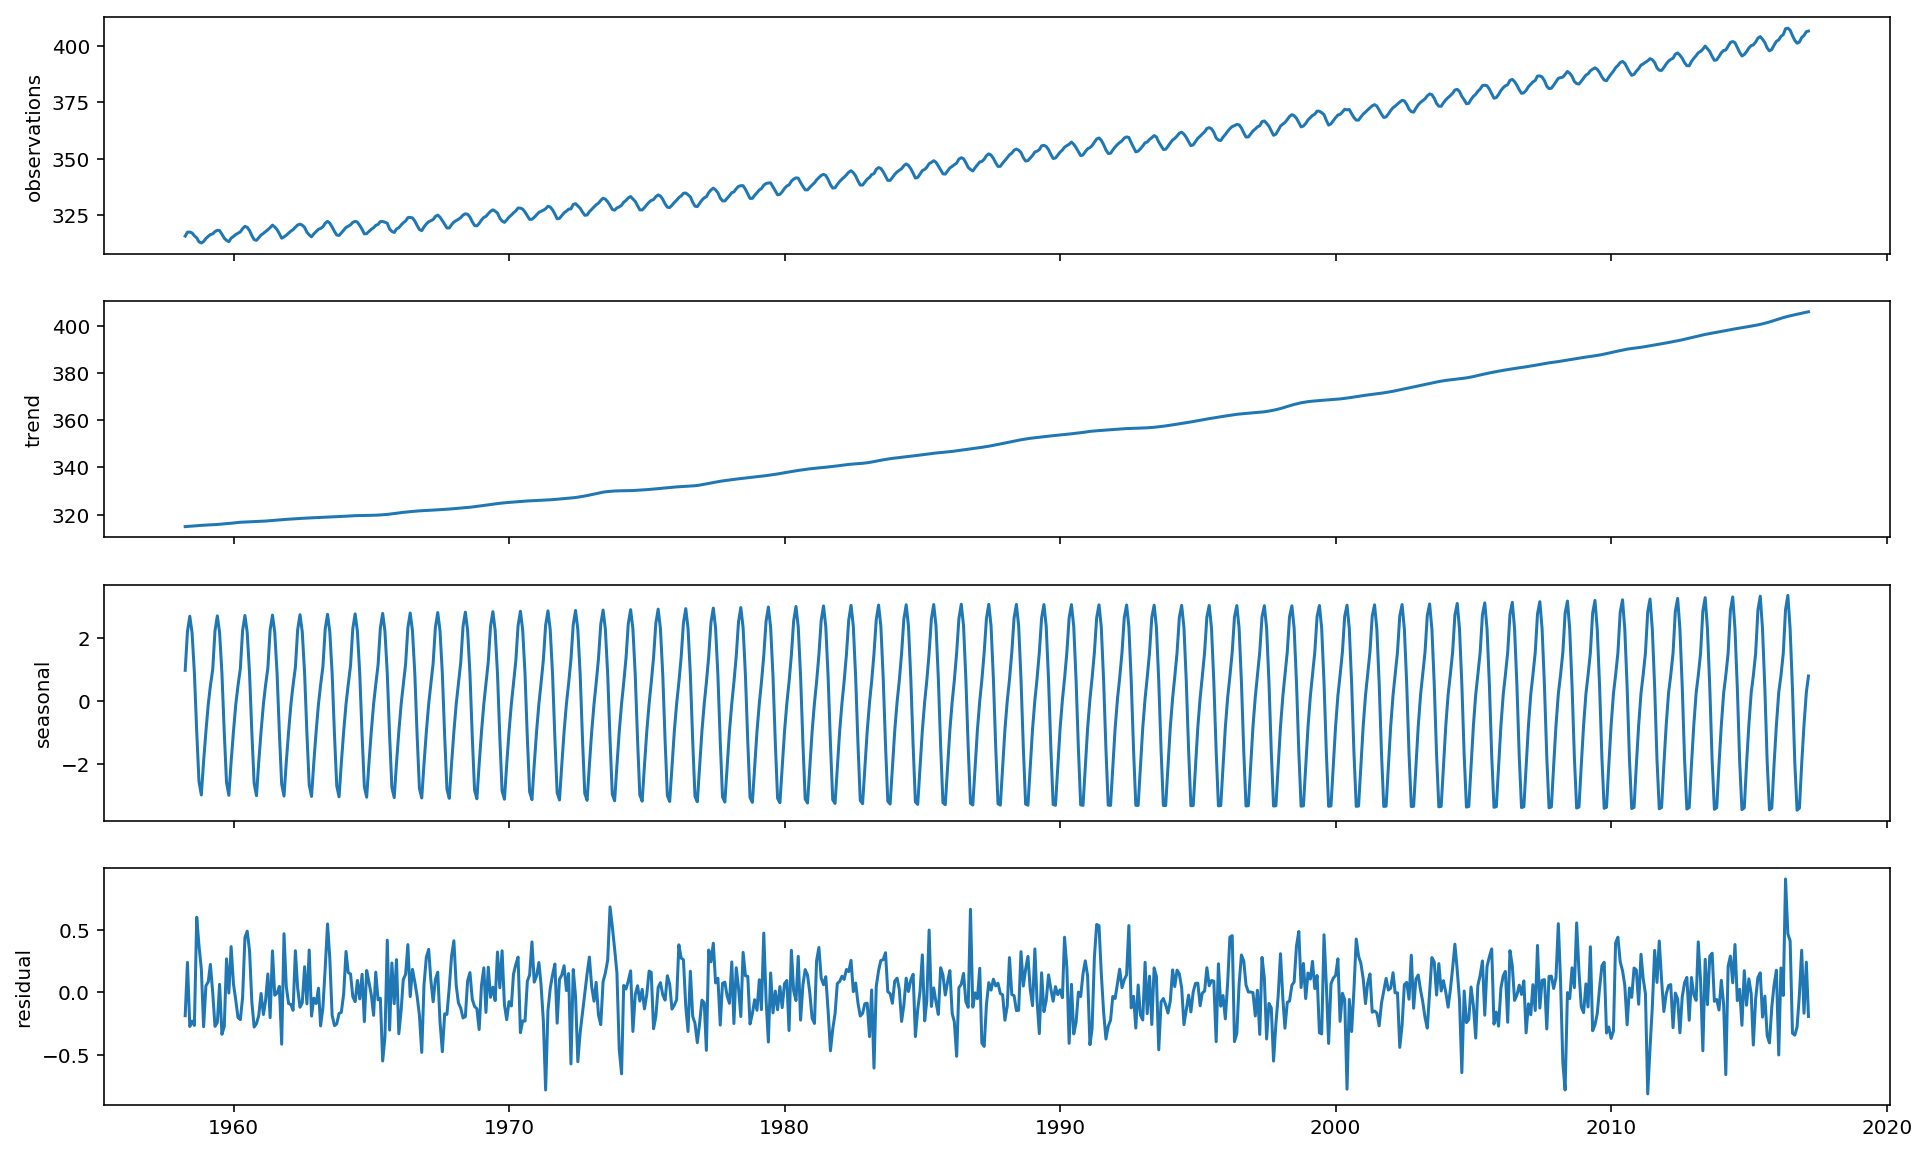

In [8]:
stl_plot(stl_fortran)

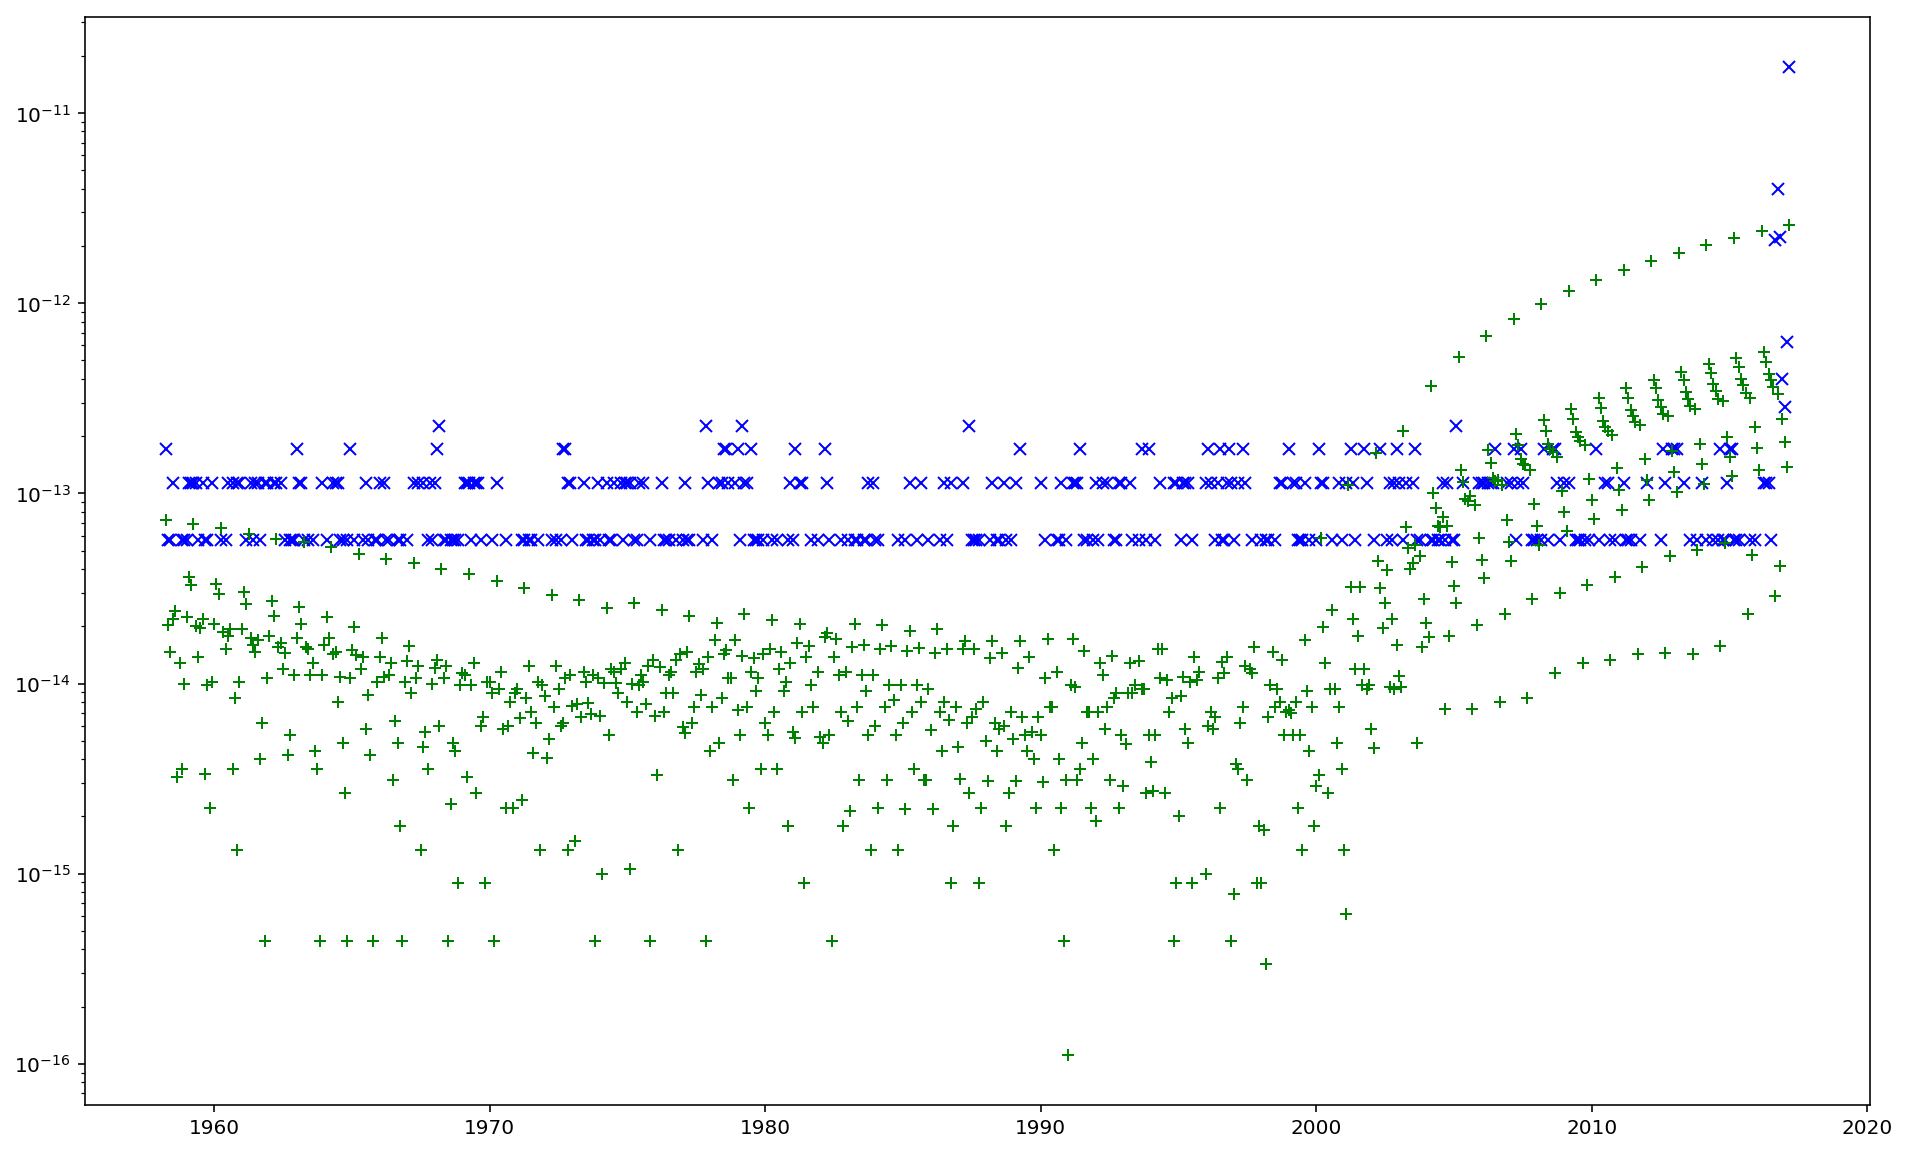

In [9]:
_ = plt.semilogy(np.abs(stl_java.trend - stl_fortran.trend), "bx")
_ = plt.semilogy(np.abs(stl_java.seasonal - stl_fortran.seasonal), "g+")